# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

***********************************
Variance Calculations and plotting
***********************************


,Variance
Delicatessen,7.934923e+06
Detergents_Paper,2.268077e+07
Fresh,1.595914e+08
Frozen,2.351429e+07
Grocery,9.010485e+07
Milk,5.434617e+07


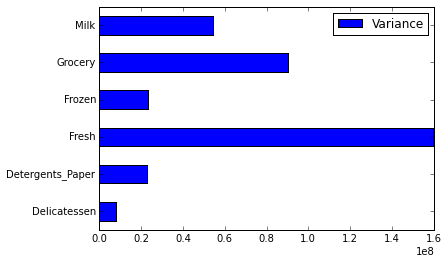

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

# Variance Calculations
print ""
print "***********************************"
print "Variance Calculations and plotting"
print "***********************************"
d = {'Fresh' : np.nanvar(data['Fresh']),
     'Milk' : np.nanvar(data['Milk']),
     'Grocery' : np.nanvar(data['Grocery']),
     'Frozen' : np.nanvar(data['Frozen']),
     'Detergents_Paper' : np.nanvar(data['Detergents_Paper']),
     'Delicatessen' : np.nanvar(data['Delicatessen'])}
s = pd.Series(d)
df = pd.DataFrame(s,columns=['Variance'])
# Variance Graph and table display
df.plot(kind='barh')
df

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

PCA seeks to reduce the dimension of the data by finding a few orthogonal linear combinations of the original variables with the largest variance [1].  Therefore, when performing the variance computation, we clearly obtain two main principal components: ‘Fresh’ (with a variance of 1.6+E08) and ‘Grocery’ (with a variance of 9+E07).


ICA on the other hands focuses on seeking linear projections, not necessarily orthogonal to each other, that
are as nearly statistically independent as possible [1]. Looking at the data, it emerges that Delicatessen is highly correlated to the concepts of Milk, Grocery, Frozen and Fresh. Consequently, the two vectors selected by ICA should be ‘Detergents_Paper’ and ‘Delicatessen’.


 [1] Imola K. Fodor (June 2002),  A survey of dimension reduction techniques, Lawrence Livermore National Laboratory, UCRL-ID148494, p2 and p6


###PCA

***********************************
Correlation Matrix
***********************************
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  

***********************************
PCA Components
***********************************
[[-0.97653685 -0.12118407 -0.06154039 -0.15

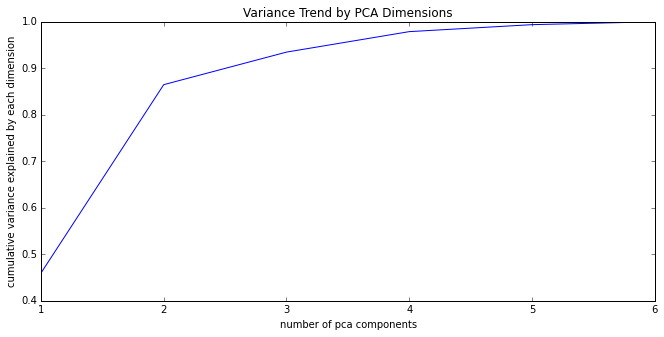

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

print "***********************************"
print "Correlation Matrix"
print "***********************************"
df1 = pd.DataFrame(data)
print df1.corr()

# Print the components and the amount of variance in the data contained in each dimension
print ""
print "***********************************"
print "PCA Components"
print "***********************************"
print pca.components_
print ""
print "***********************************"
print "PCA Explained Variance Ratio"
print "***********************************"
print pca.explained_variance_ratio_
print ""
print "***********************************"
print "Variance Trend by PCA Dimensions"
print "***********************************"
plt.figure(figsize=(11,5))
plt.plot(np.arange(1,7),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of pca components")
plt.ylabel("cumulative variance explained by each dimension")
plt.title("Variance Trend by PCA Dimensions")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

When the number of component selected is set to the number of dimensions (i.e. 6), the variance drop off by between the first and the second component, i.e. from  0.46 to 0.40 is relatively small. This is represented  a drop of 13%, calculated as (0.4-0.46)/.46. However, the drop between the second and third component is very large, 82% from 0.4 to 0.07. This is the point of diminishing returns. 

When the number of component selected is set to the number of dimensions (i.e. 6), two components contain 86% (0.46+0.40) of the variance of the 6 original values. ‘Component 1’ explains 46% of the variation, ‘component  2’ explains 40%, and the rest of the components explain 14% of the variation.  If we assume we want to retain 85% of the variance, then we should reduce the feature set to the first 2 components. 

This is also shown by the graph above; there is a steep increase of the cumulative variance explained by each dimension (y-axis) until the second PCA component. Then the curve plateaus. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

‘Component 1’ corresponds to the ‘Fresh’ feature as it represents more than 97% of the variance. ‘Component 2’ corresponds to ‘Milk’, ‘Grocery’ and ‘Detergents_Paper’. They account respectively 51%, 76% and 36% of the variance.

This is also shown by the correlation above. The ‘Fresh’ only depends on itself. The  ‘Milk’, ‘Grocery’ and ‘Detergents_Paper’ show high degree of correlation:
- ‘Milk & Grocery’ shows a correlation of 73%
- ‘Milk & Detergents_Paper ‘shows a correlation of 66%
- ‘Detergents_Paper & Grocery ‘shows a correlation of 92%

This information is useful as a feature reduction tool (with minimum loss of information) to feed into a machine learning algorithm. By reducing the number of factors, a simpler (and usually faster) machine learning algorithm can be selected.


###ICA


***********************************
Calculate the Mean for each Category and graph
***********************************
Axes(0.125,0.125;0.775x0.775)

***********************************
Data with Origin Adjustment
***********************************

***********************************
FastICA
***********************************

***********************************
Component data and plot
***********************************
[[  3.97599355e-06  -8.59886636e-07  -6.28711730e-07  -6.77060709e-07
    2.07067530e-06  -1.04098223e-06]
 [ -2.10115505e-07   1.88251426e-06  -6.45028663e-06  -4.08141212e-07
    8.61829574e-07   1.46521187e-06]
 [ -1.53807253e-07  -9.84447608e-06   5.81239885e-06   3.63403734e-07
   -3.32305393e-06   6.05623018e-06]
 [ -2.99003233e-07   2.31324193e-06   1.20452467e-05  -1.46364692e-06
   -2.82034564e-05  -5.73086477e-06]
 [ -8.65159287e-07  -1.40577395e-07   7.73992444e-07   1.11462064e-05
   -5.54399614e-07  -5.95213935e-06]
 [  3.86475758e-07   2.19541928e-07 

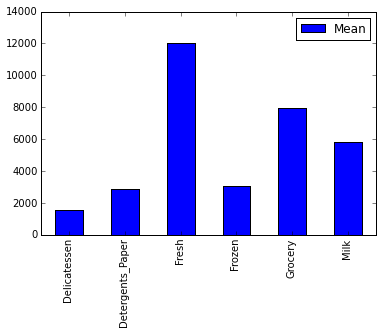

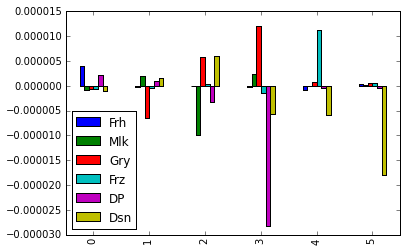

In [3]:
#Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
print ""
print "***********************************"
print "Calculate the Mean for each Category and graph"
print "***********************************"
means = {'Fresh' : np.nanmean(data['Fresh']),
         'Milk' : np.nanmean(data['Milk']),
         'Grocery' : np.nanmean(data['Grocery']),
         'Frozen' : np.nanmean(data['Frozen']),
         'Detergents_Paper' : np.nanmean(data['Detergents_Paper']),
         'Delicatessen' : np.nanmean(data['Delicatessen'])}
s_means = pd.Series(means)
df_means = pd.DataFrame(s_means,columns=['Mean']).plot.bar()
print df_means
df_means.plot(kind='barh')

print ""
print "***********************************"
print "Data with Origin Adjustment"
print "***********************************"
columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
centered = pd.DataFrame(data[columns] - s_means[columns],columns = columns)
centered

print ""
print "***********************************"
print "FastICA"
print "***********************************"
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 6, random_state=10)
ica_transformed = ica.fit_transform(centered)

print ""
print "***********************************"
print "Component data and plot"
print "***********************************"
print ica.components_
pd.DataFrame(ica.components_,columns =['Frh','Mlk','Gry','Frz','DP','Dsn']).plot.bar();


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

Generally, dimensions represent Eigen vectors and the directions along the variation of the data.  The Independent Component Analysis (ICA) attempts to decompose a multivariate signal into independent non-Gaussian signals. It is primarily used to 'untangle 'observed data and calculate source signals which, in varying linear combinations, can make the observed data. In other words, as the absolute value of the elements of the un-mixing matrix increases, the corresponding feature has a strong effect on that component. Therefore the magnitude of the coefficient represents prevalence in that feature. 

ICA can help transforming the data (i.e. making each component independent) before running machine learning algorithm that requires data independency (e.g. the regression model or the Mixture of Gaussians clustering)

For these ICA graph we can state the following:
- The ‘Fresh’ dimension (‘0’ on the x-axis) is positively correlated to the ‘Fresh’ feature and 'Detergents_Paper', and negatively correlated to all the other features.
- The ‘Milk’ dimension (‘1’ on the x-axis) is positively correlated to the ‘Milk’, 'Detergents_Paper' and ‘Delicatessen’, and negatively correlated to all the other features.
- The ‘Grocery’ dimension (‘2’ on the x-axis) is positively correlated to the ‘Grocery’ and  ‘Delicatessen ‘, and negatively correlated to all the other features.
- The ‘Frozen’ dimension (‘3’ on the x-axis) is positively correlated to the ‘Milk’,‘Grocery’ and  ‘Grocery’, and negatively correlated to all the other features.
- The ‘Detergents_Paper’ dimension (‘4’ on the x-axis) is positively correlated to the ‘Frozen’ and ‘Grocery’, and negatively correlated to all the other features.
- The ‘Delicatessen’ dimension (‘5’ on the x-axis) is positively correlated to all but the 'Detergents_Paper' and ‘Delicatessen’

Looking at the graph, it looks like the dimensions with the highest positive correlations are the 3rd (‘Frozen’) and 4th (‘Detergents_Paper’) .  The results only agree partially with the PCA.
Therefore, this means that including only these two features in the training of the algorithm would account for maximum coverage of the variability in the dataset with a minimum loss of information.

Generally, dimensions represent Eigen vectors and the directions along the variation of the data.  The Independent Component Analysis (ICA) attempts to decompose a multivariate signal into independent non-Gaussian signals. It is primarily used to 'untangle 'observed data and calculate source signals which, in varying linear combinations, can make the observed data. In other words, as the absolute value of the elements of the un-mixing matrix increases, the corresponding feature has a strong effect on that component. Therefore the magnitude of the coefficient represents prevalence in that feature. 

ICA can help transforming the data (i.e. making each component independent) before running machine learning algorithm that requires data independency (e.g. the regression model or the Mixture of Gaussians clustering)

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

i) Choose the Cluster Type:

Gaussian mixture models and K-means are two canonical approaches to clustering, i.e. dividing data points into meaningful groups.

- K-means works by iteratively reassigning data points to clusters and computing cluster centres based on the 
   average of the point locations. 
- K-means has a limited set of parameters corresponding to the number of clusters, where the Mixture of Gaussians 
  can have many.
- K-means is usually used in the following scenarios: as a general-purpose, even cluster size, flat geometry and where 
  they are not too many clusters.


- Gaussians Mixture is a probabilistic model commonly used for clustering: partitioning a set of data points into a set 
  of clusters, where data points within a cluster are similar to one another. 
- Gaussians Mixture is not scalable.
-  Gaussians Mixture is better at density estimation.
- Gaussians Mixture provides structural information, thus it can measure how wide each cluster is, since it works on 
  probabilities (soft clustering)

In summary, K-means is a more simplistic, more scalable and faster algorithm than the Gaussian mixture models, but it is Mixture of Gaussians is better at density estimation.

For our scenario, it is important to understand the customer size of customer groups (i.e. clusters) to better predict the impact of shops service changes on the overall profitability. For example, a service change could have a major impact on a group of customers. However, if this group is relatively small and have a small negative profit impact, then the change might be pushed forward (assuming this change has positive effects on the other groups) to increase the overall profit.  Therefore the Gaussians Mixture will be selected as the machine learning algorithm.

ii) Decide on K means clustering or Gaussian mixture methods:

The choice of cluster numbers has been discovered by the ‘Silhouette score’, as shown in the below graph.
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. A higher Silhouette Coefficient score relates to a model with better defined clusters.
The highest ‘Silhouette Coefficient’ is 0.51 and is represented by 2 clusters. Adding any extra cluster reduces the ‘Silhouette Coefficient’ (law of diminishing returns).


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# Cluster numbers selections

[0.51153338987790531, 0.47835114307820586, 0.38663137000581971, 0.37097890183482163, 0.38296957586808894]


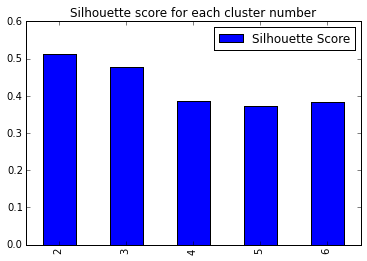

In [6]:
#Method 1 - Using the Silhouette Coefficient -> A higher Silhouette Coefficient score relates to a model with better defined clusters.
def build_silhouette_score_list(cluster_number_list):
    from sklearn import metrics

    silhouette_score_list = []

    for cluster_number in cluster_number_list:
        kmeans_model = KMeans(n_clusters=cluster_number, random_state=1).fit(data)
        labels = kmeans_model.labels_
        score = metrics.silhouette_score(data, labels, metric='euclidean')
        silhouette_score_list.append(score)
    
    return silhouette_score_list

cluster_number_list = [2,3,4,5,6]
silhouette_score_list = build_silhouette_score_list (cluster_number_list)
s_silhouette_score_list = pd.Series(silhouette_score_list)
plot = pd.DataFrame(s_silhouette_score_list, columns=["Silhouette Score"]).plot.bar(title="Silhouette score for each cluster number").set_xticklabels( cluster_number_list )
print silhouette_score_list

In [7]:
#Method 2 - Centroids can be comparison.  
# Aim: Sample from the clusters to get a better understanding of the distribution of the clusters.
# This should help the best cluster number decision. 

# pca.fit(data)
pca.inverse_transform(data)

# One technique is to use PCA.inverse_transform() to take the centroids and use the PCA model to bring 
# the centroids into the original dimensions. 
# Then the centroids can be compared. 
# Also making a bar chart of the centroids in the original dimensions could be very helpful for comparing the 
# centroids to each other and looking for patterns.

array([[ -2776.91252812,  13546.92151943,  12671.04738588,   7070.20338104,
          4375.34067727,    542.8608177 ],
       [  2266.17957158,  14470.80363977,  13242.65287037,  10486.72550173,
          3960.09275456,    786.77644498],
       [  3281.88591669,  12912.06023622,  15738.66649787,   9651.22752937,
         -1170.37978763,  -1584.2250788 ],
       ..., 
       [ -9113.53545582,  30241.1939404 ,   9111.22924403,  25692.89594519,
          3985.06518922,  -4130.15006476],
       [  1259.78887804,   6144.29214581,   9453.21321121,   3740.70756722,
          1560.10740708,    830.03776493],
       [  8646.7721533 ,   7670.89207658,   8355.17052726,   4554.48888726,
          3072.03559565,   1690.28605609]])

In [8]:
# First we reduce the data to two dimensions using PCA to capture variation
pca_2 = PCA(n_components=2)
reduced_data =  pca_2.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [9]:
# Implement the clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
gmm = GMM(n_components=2)
clusters = gmm.fit(reduced_data)

print clusters


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [10]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [11]:
# Find the centroids for KMeans or the cluster means for GMM 
centroids = gmm.means_ 
print centroids

[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


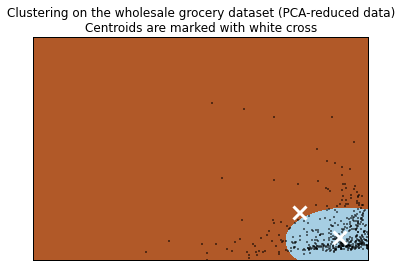

In [12]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Central objects in each cluster represent the centroids. They represent the "average" customer in that grouping.

The graph above shows two distinct data clusters. This means there are two groups of customers that have different consuming patterns. This is shown by the fact that one of the group of consumer (in light brown) is concentrated around its centroid, whereas the second group (in blue) is more sparsely allocated around its centroid.
This certainly means brown cluster represents small family run shops, whereas the blue cluster represents large volume customers.

Some of the clusters are not very well distinguished, for example in the middle section of the ‘brown’ area.  We could make them appear by increase the cluster number. But this would bear the risk of increasing overfitting.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

PCA provided with a very clear insight on the main features impacting the model.   
K-means enabled the bucketing of the customers into their respective market segments and thus facilitates better business decision making.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

One popular technique would be to run an AB test. It directly compares a variation against a current experience. The analyst can then produce focused questions about changes to the domain, and then collects data about the impact of that change. 

In our case, the following steps could be defined:
 - To create a control and experiment group within the market segments. As different retailer 
   sizes provide different customer experience.
 - And calculate the p-value for to accept/reject predefined hypotesis relating to consumer 
   pattern given a type of retail premise (e.g. large or small). 

Based on the result of this analysis, a marketing strategy could be put in place to safisfy the different customer segments.


**10)** How would you use that data to help you predict future customer needs?

Answer: 

By defining customer segments, it is now possible to we can run different tests (e.g. regression) to improve  profit margin and target the supply products of interest to the particular segments. 

The clustering produces labels that could be fed into supervised model to predict the customer pattern based on this classification. This could prove useful for the launch of a new shop in a new area.
